# Predicting Bike Rentals in Washington D.C
The data set contains 17380 rows of bike rentals on a single hour.

The goal is to predict the total number of bikes rented in a given hour ("cnt" hour).

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


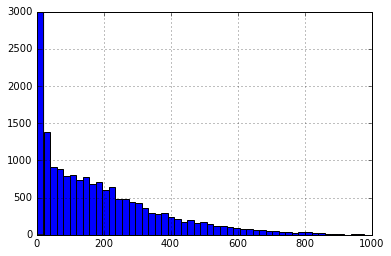

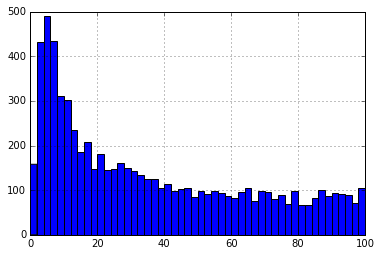

In [3]:
bike_rentals["cnt"].hist(bins=50)
plt.show()
bike_rentals["cnt"].hist(bins=50, range=[0, 100])
plt.show()

In [4]:
print(bike_rentals.corr()["cnt"])

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


## Calculating Features
--> Enhance the accuracy of models by introducing new information

In [12]:
def assign_label(row_hour):
    
    if row_hour >= 0 and row_hour < 6:
        return 4
    elif row_hour >= 6 and row_hour < 12:
        return 1
    elif row_hour >= 12 and row_hour < 18:
        return 2
    elif row_hour >= 18 and row_hour <= 24:
        return 3
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals["time_label"].head(20)

0     4
1     4
2     4
3     4
4     4
5     4
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    2
15    2
16    2
17    2
18    3
19    3
Name: time_label, dtype: int64

## Train / Test Split

In [13]:
train = bike_rentals.sample(frac = .8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Remove bad features

In [14]:
list_features = list(train.columns)
bad_features = ["cnt","casual","registered","dteday"]

for el in bad_features:
    list_features.remove(el)

## Linear Regression for predicting bike rentals

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train[list_features], train["cnt"])
predictions = model.predict(test[list_features])

print(np.mean((predictions - test["cnt"]) ** 2))

17462.2988855


The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. High Rental counts could be considered as outliers data because there is a few amount of these data.
Larger errors are penalized more with MSE, which leads to a higher total error.

## Decision Trees

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

model_tree = DecisionTreeRegressor()

model_tree.fit(train[list_features], train["cnt"])
predictions = model_tree.predict(test[list_features])


print(np.mean((predictions - test["cnt"]) ** 2))

3388.80322209


In [23]:
model_tree = DecisionTreeRegressor(min_samples_leaf = 5)

model_tree.fit(train[list_features], train["cnt"])
predictions = model_tree.predict(test[list_features])


print(np.mean((predictions - test["cnt"]) ** 2))

2663.96872139


Using a non linear predictor is much better, we have an higher accuracy than linear regression.

## Random Forests : Improve the Decision Tree prediction

In [37]:
rf = RandomForestRegressor(random_state=1, min_samples_leaf = 2)

rf.fit(train[list_features], train["cnt"])
predictions = rf.predict(test[list_features])

print(np.mean((predictions - test["cnt"]) ** 2))

1875.74067529


**The accuracy of Random Forests is higher than Decision Trees because it removes sources of Overfitting.**